# Rede neural convolucional - personagens

## Importação das bibliotecas

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator



## Carregamento das imagens

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


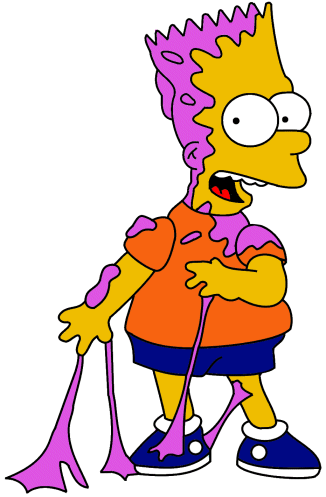

In [3]:
tf.keras.preprocessing.image.load_img(r'/content/drive/MyDrive/IA 2025/Redes neurais artificiais/base/test_set/bart/bart1.bmp')

## Construção das bases de treinamento e teste

In [3]:
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                         rotation_range=7,
                                         horizontal_flip=True,
                                         zoom_range=0.2)
base_treinamento = gerador_treinamento.flow_from_directory('/content/drive/MyDrive/IA 2025/Redes neurais artificiais/base/training_set',
                                                           target_size = (64, 64),
                                                           batch_size = 8,
                                                           class_mode = 'categorical')

Found 196 images belonging to 2 classes.


In [5]:
base_treinamento.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [6]:
base_treinamento.class_indices

{'bart': 0, 'homer': 1}

In [4]:
gerador_teste = ImageDataGenerator(rescale=1./255)
base_teste = gerador_teste.flow_from_directory('/content/drive/MyDrive/IA 2025/Redes neurais artificiais/base/test_set',
                                                     target_size = (64, 64),
                                                     batch_size = 8,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 73 images belonging to 2 classes.


## Construção e treinamento da rede neural

In [5]:
rede_neural = Sequential()
rede_neural.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
rede_neural.add(MaxPooling2D(pool_size=(2,2)))

rede_neural.add(Conv2D(32, (3,3), activation='relu'))
rede_neural.add(MaxPooling2D(pool_size=(2,2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(units = 6, activation='relu'))
rede_neural.add(Dense(units = 4, activation='relu'))
rede_neural.add(Dense(units = 4, activation='relu'))
rede_neural.add(Dense(units = 4, activation='relu'))
rede_neural.add(Dense(units = 2, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
rede_neural.compile(optimizer='adam', loss='categorical_crossentropy',
                    metrics = ['accuracy'])

In [7]:
rede_neural.fit(base_treinamento, epochs=200, validation_data=base_teste)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 143s 6s/step - accuracy: 0.5679 - loss: 0.6930 - val_accuracy: 0.5753 - val_loss: 0.6919
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.6287 - loss: 0.6903 - val_accuracy: 0.5753 - val_loss: 0.6901
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.5904 - loss: 0.6891 - val_accuracy: 0.5753 - val_loss: 0.6890
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.6043 - loss: 0.6868 - val_accuracy: 0.5753 - val_loss: 0.6877
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.6175 - loss: 0.6837 - val_accuracy: 0.5753 - val_loss: 0.6865
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.5642 - loss: 0.6876 - val_accuracy: 0.5753 - val_loss: 0.6861
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.6317 - loss: 0.6791 - val_accuracy: 0.5753 - val_loss: 0.6851
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.6375 - loss: 0.6761 - val_accuracy:

## Avaliação da rede neural

In [8]:
base_teste.class_indices

{'bart': 0, 'homer': 1}

In [9]:
previsoes = rede_neural.predict(base_teste)
previsoes

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


array([[0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.6026622 , 0.39733776],
       [0.

In [ ]:
import numpy as np
previsoes2 = np.argmax(previsoes, axis = 1)
previsoes2

In [ ]:
base_teste.classes

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(previsoes2, base_teste.classes)

In [ ]:
base_teste.class_indices

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(previsoes2, base_teste.classes)
sns.heatmap(cm, annot=True)